In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Open Food Facts dataset from a TSV file
df_food = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

# Get all the columns in the DataFrame
all_columns = df_food.columns
df_food['product_name'].fillna('', inplace=True)
columns = ['product_name','generic_name','quantity','packaging','brands','categories_en','countries_en','ingredients_text','traces','additives','main_category_en','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','cocoa_100g','trans-fat_100g','manufacturing_places','image_small_url']

organic = df_food[df_food['categories_en'].str.contains('organic', case=False, na=False)][columns]

C:\Users\Merpster\AppData\Local\Temp\ipykernel_12236\4038529398.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_food['product_name'].fillna('', inplace=True)


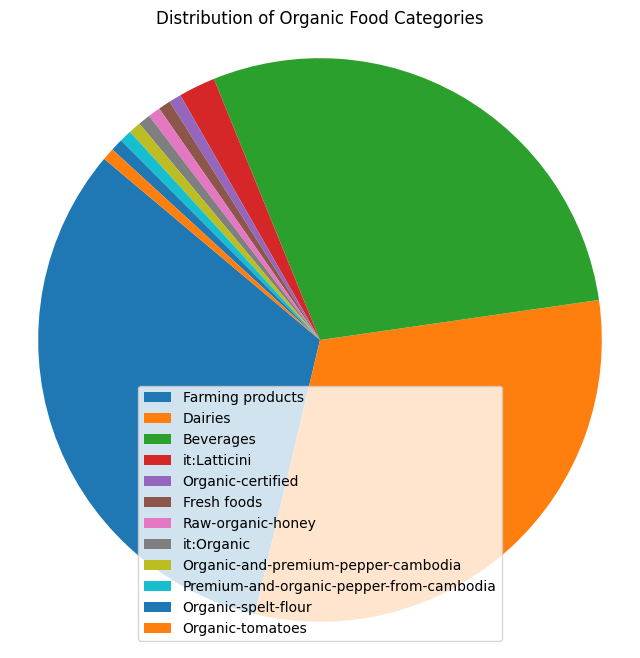

In [4]:
filtered = organic.dropna(subset=['main_category_en'])

# Count occurrences of each category
category_counts = filtered['main_category_en'].value_counts()

# Plotting the pie chart without labels
plt.figure(figsize=(8, 8))
plt.pie(category_counts, autopct='', startangle=140)
plt.title('Distribution of Organic Food Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(category_counts.index, loc='best')

plt.show()


## Distribution of Organic Food Categories 

This shows what categories are more likely to have foods with the keyword 'organic' in the name. You can see that Farming products and dairy products contain over half the organic products which should come to no surprise. However, to somewhat of a surprise beverages is the next leading category showing that organic juices and over drinks are very popular.


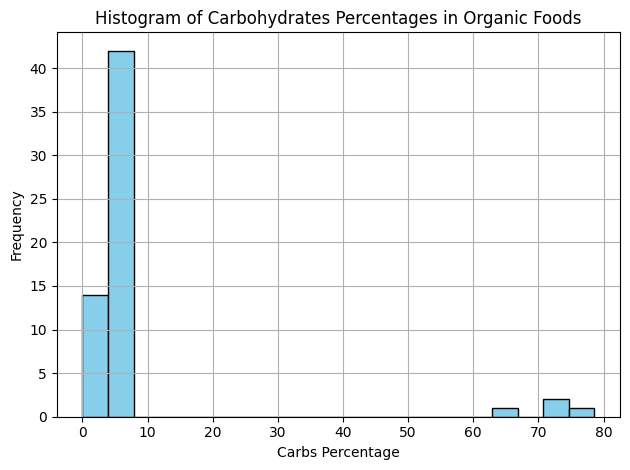

In [5]:
plt.hist(organic['carbohydrates_100g'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Carbohydrates Percentages in Organic Foods')
plt.xlabel('Carbs Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Histogram of Carbohydrates Percentages in Organic Foods

This histogram shows that the vast majority of organic foods have a very low percentage of carbohydrates within the food. There are almost no organic products with a mid level percentage of carbs within the food, but there is a small amount of products that contain very high levels of carbohydrates from 60%-80%. These foods will probably be starch foods such as potatos. 

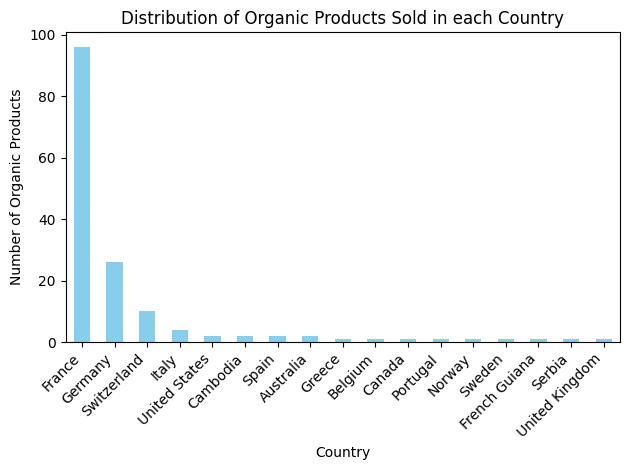

In [3]:
split = organic.assign(countries_en=organic['countries_en'].str.split(','))
exploded = split.explode('countries_en')
country_counts = exploded['countries_en'].value_counts()

# Plot the distribution of dark chocolate products by country
#plt.figure(figsize=(15, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Organic Products Sold in each Country')
plt.xlabel('Country')
plt.ylabel('Number of Organic Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Distribution of Organic Products Sold in each Country

The graph above shows the distribution of organic products sold by country. France leads by a large margin with almost a 100 organic products in the data set. Interestingly the United States is not far behind rank wise, as the U.S. ranks 5th in the most organic products sold, even though it doesn't have more than 5 organic products. Furthermore, these products are seperated by products that have organic in the name, this does not mean that every 'organic' product is indeed healthy.